In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,NaN,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,NaN,26.2,0.245,30.0
766,1.0,126.0,60.0,NaN,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	57
float64		column 2	38
float64		column 3	133
float64		column 4	76
float64		column 5	76
float64		column 6	95
float64		column 7	38
float64		column 8	95


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,711.000000,730.000000,635.000000,692.000000,692.000000,673.000000,730.000000,673.000000
mean,3.886076,121.132877,69.001575,20.833815,77.232659,31.658395,0.473025,33.083210
std,3.336054,32.051615,18.850608,15.655290,108.152138,7.621033,0.331146,11.620445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.200000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,31.600000,0.380000,29.000000
75%,6.000000,141.000000,78.000000,32.000000,125.000000,36.000000,0.622750,40.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,59.400000,2.420000,81.000000


<AxesSubplot:>

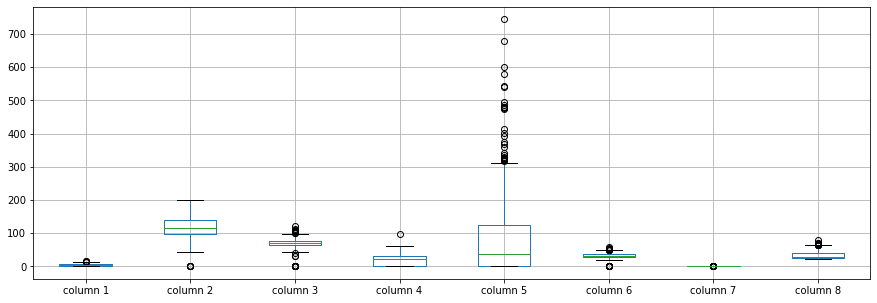

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.886076
column 2    121.132877
column 3     69.001575
column 4     20.833815
column 5     77.232659
column 6     31.658395
column 7      0.473025
column 8     33.083210
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.136614,0.108987,-0.078792,-0.075257,0.001162,-0.025648,0.569184
column 2,0.136614,1.000000,0.155817,0.058832,0.304579,0.215833,0.153466,0.264868
column 3,0.108987,0.155817,1.000000,0.173152,0.096543,0.261199,0.039806,0.259649
column 4,-0.078792,0.058832,0.173152,1.000000,0.421826,0.396297,0.166134,-0.092241
column 5,-0.075257,0.304579,0.096543,0.421826,1.000000,0.206362,0.187303,-0.064374
column 6,0.001162,0.215833,0.261199,0.396297,0.206362,1.000000,0.167593,0.019420
column 7,-0.025648,0.153466,0.039806,0.166134,0.187303,0.167593,1.000000,0.025955
column 8,0.569184,0.264868,0.259649,-0.092241,-0.064374,0.019420,0.025955,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+45,8+45+45,8+45+45+45,8+45+45+45+45,8+45+45+45+45+45,8+45+45+45+45+45+45,8+45+45+45+45+45,8+45+45+45+45,8+45+45+45,8+45+45,8+45,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 379.7113838195801
Epoch: 1 , loss: 379.1136951446533
Epoch: 2 , loss: 378.6235122680664
Epoch: 3 , loss: 375.8461208343506
Epoch: 4 , loss: 374.1831963857015
Epoch: 5 , loss: 372.38305473327637
Epoch: 6 , loss: 370.3015556335449
Epoch: 7 , loss: 366.0887915293376
Epoch: 8 , loss: 363.98385683695477
Epoch: 9 , loss: 355.9430802663167
Epoch: 10 , loss: 354.4520918528239
Epoch: 11 , loss: 344.6509189605713
Epoch: 12 , loss: 345.21132787068683
Epoch: 13 , loss: 340.96432940165204
Epoch: 14 , loss: 331.3188250859578
Epoch: 15 , loss: 326.2278642654419
Epoch: 16 , loss: 317.13134765625
Epoch: 17 , loss: 321.10014088948566
Epoch: 18 , loss: 315.64398797353107
Epoch: 19 , loss: 309.2362330754598
Epoch: 20 , loss: 298.4925667444865
Epoch: 21 , loss: 302.8764877319336
Epoch: 22 , loss: 292.79225063323975
Epoch: 23 , loss: 290.0125484466553
Epoch: 24 , loss: 288.87595717112225
Epoch: 25 , loss: 294.25521659851074


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    51.385220
column 4     0.000000
column 5     0.000000
column 6    35.400000
column 7     0.388000
column 8    26.470171
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-28.488741
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.509235,19.787743
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,-47.574583,0.000000,0.0,0.000000,0.000000
764,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
765,0.0,0.0,0.0,0.000000,-69.786831,0.0,0.000000,0.000000
766,0.0,0.0,0.0,19.343775,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1780.1034397907192, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.30815890989896905

In [18]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3     88.000000
column 4     30.000000
column 5      0.000000
column 6     32.500000
column 7      0.437021
column 8     38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.000000,0.000000,33.6,0.627000,21.511259
1,1.0,85.0,66.0,29.000000,0.000000,26.6,0.351000,31.000000
2,8.0,183.0,64.0,0.000000,0.000000,23.3,0.672000,32.000000
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.676235,40.787743
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288000,33.000000
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,0.425417,180.000000,32.9,0.171000,63.000000
764,2.0,122.0,70.0,27.000000,0.000000,36.8,0.340000,27.000000
765,5.0,121.0,72.0,23.000000,42.213169,26.2,0.245000,30.000000
766,1.0,126.0,60.0,19.343775,0.000000,30.1,0.349000,47.000000


In [20]:
imputations[-1].to_excel("PID_NG_10.xlsx", index=False, header=False)